In [7]:
# Import necessary libraries
import os
from dotenv import load_dotenv
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [8]:
# Load environment variables from .env file
load_dotenv('../../../adventure_db/.env')

# Get database credentials from environment variables
pwd = os.getenv('POSTGRES_PASSWORD')
uid = os.getenv('POSTGRES_USER')
host = os.getenv('POSTGRES_HOST')
port = os.getenv('POSTGRES_PORT')
database = os.getenv('POSTGRES_DB')


In [9]:
# Create a connection string
connection_string = f"postgresql://{uid}:{pwd}@{host}:{port}/{database}"

# Create a SQLAlchemy engine
engine = create_engine(connection_string)

# Query the vw_salesoverview view and load it into a Pandas DataFrame
query = "SELECT * FROM sales.salesorderheader"
df = pd.read_sql(query, engine)

# Display the DataFrame
df.head()

,salesorderid,revisionnumber,orderdate,duedate,shipdate,status,onlineorderflag,purchaseordernumber,accountnumber,customerid,salespersonid,territoryid,billtoaddressid,shiptoaddressid,shipmethodid,creditcardid,creditcardapprovalcode,currencyrateid,subtotal,taxamt,freight,totaldue,comment,rowguid,modifieddate
0,43659,8,2011-05-31,2011-06-12,2011-06-07,5,False,PO522145787,10-4020-000676,29825,279.0,5,985,985,5,16281.0,105041Vi84182,NaN,20565.6206,1971.5149,616.0984,23153.2339,None,79b65321-39ca-4115-9cba-8fe0903e12e6,2011-06-07
1,43660,8,2011-05-31,2011-06-12,2011-06-07,5,False,PO18850127500,10-4020-000117,29672,279.0,5,921,921,5,5618.0,115213Vi29411,NaN,1294.2529,124.2483,38.8276,1457.3288,None,738dc42d-d03b-48a1-9822-f95a67ea7389,2011-06-07
2,43661,8,2011-05-31,2011-06-12,2011-06-07,5,False,PO18473189620,10-4020-000442,29734,282.0,6,517,517,5,1346.0,85274Vi6854,4.0,32726.4786,3153.7696,985.5530,36865.8012,None,d91b9131-18a4-4a11-bc3a-90b6f53e9d74,2011-06-07
3,43662,8,2011-05-31,2011-06-12,2011-06-07,5,False,PO18444174044,10-4020-000227,29994,282.0,6,482,482,5,10456.0,125295Vi53935,4.0,28832.5289,2775.1646,867.2389,32474.9324,None,4a1ecfc0-cc3a-4740-b028-1c50bb48711c,2011-06-07
4,43663,8,2011-05-31,2011-06-12,2011-06-07,5,False,PO18009186470,10-4020-000510,29565,276.0,4,1073,1073,5,4322.0,45303Vi22691,NaN,419.4589,40.2681,12.5838,472.3108,None,9b1e7a40-6ae0-4ad3-811c-a64951857c4b,2011-06-07


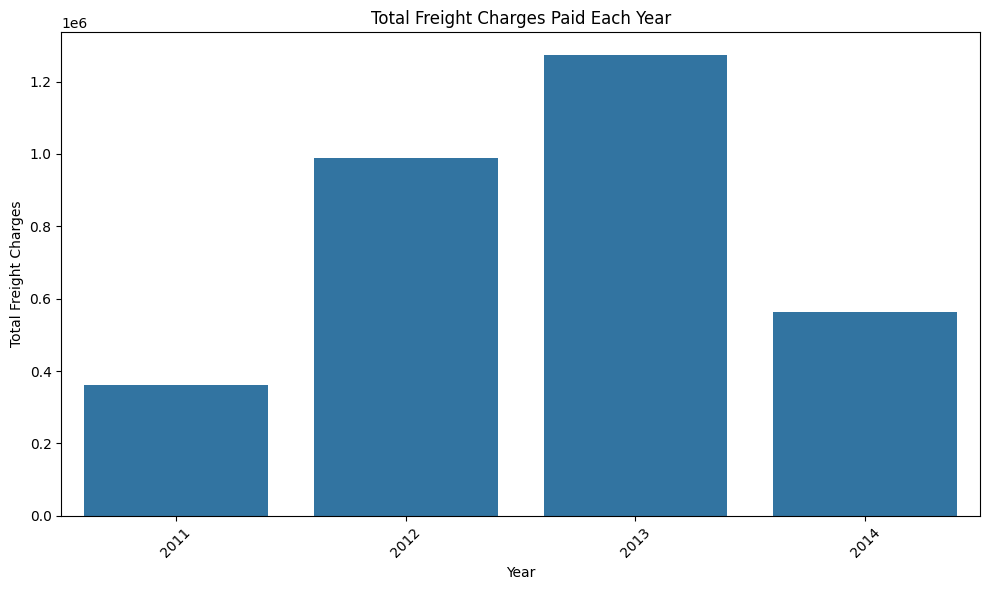

In [10]:
# ... existing code ...

# Tính tổng cước phí chi trả mỗi năm
df['orderdate'] = pd.to_datetime(df['orderdate'])  # Đảm bảo cột ngày là kiểu datetime
df['year'] = df['orderdate'].dt.year  # Thêm cột năm
yearly_freight = df.groupby('year')['freight'].sum().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='year', y='freight', data=yearly_freight)
plt.title('Total Freight Charges Paid Each Year')
plt.xlabel('Year')
plt.ylabel('Total Freight Charges')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ... existing code ...